# Ejemplo de Red Neuronal

#### En este notebook se muestra un pequeño ejemplo de como implementar una red neuronal con la libreria Tensorflow.
#### Para ilustrar este ejemplo se utilizará el conocido conjunto de datos MNIST. Este conjunto de datos esta compuesto por un total de 70.000 imagenes de caracteres numéricos escritos a mano. Estas imágenes se dividen en 60.000 para el entranmiento del modelo y 10.000 para validarlo. En estas imágenes encontramos la totalidad de los caracteres numéricos (0, 1, 2, 3, 4, 5, 6, 7, 8 y 9).
#### El problema consiste en la creación de un modelo que sea capaz de identificar los números. Para ello entrenaremos una red nueranal que sea capaz de predecir estos números con un nivel de precisión alto. Este proceso se explica a continuación.

## Importación de las librerias

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Importación del conjunto de datos
#### Se importa el conjunto de datos que tiene disponible la libreria Tensorflow.
#### Las datos se dividen en el conjunto de entrenamiento y el conjunto de test.

In [2]:
#dataset = keras.datasets.fashion_mnist
dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#### Introducimos las etiquetas (clases) del conjunto de datos en un array.

In [4]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Características del conjunto de datos
#### Comprobamos las dimensiones del conjunto de datos

In [5]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000


#### Comprobamos las características de las imágenes 

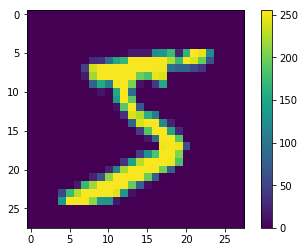

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocesamiento
#### Limitamos los valores de los píxeles al intervalo [0, 1] 

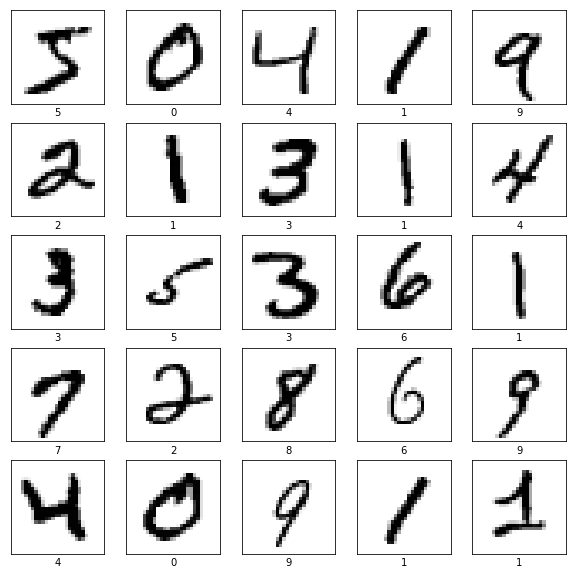

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Configuracón y entrenamiento del modelo 
#### Hemos de construir el modelo. Para ello hemos de configurar, en este caso, nuestra red neuronal con una serie de capas. Las capas estan formadas por una serie de neuronas que reciben información de otras capas o de las entradas del sistema y generan una nueva información que a su vez es trasmitida a otra coapa o a la salida del sistema. En función del tipo de red neuronal que queramos realizar existen diferentes tipos de capas. En la documentación de Tensorflow (https://www.tensorflow.org/api_docs/python/tf/keras/layers) se descrive cada una de las opciones.
#### En este tuorial unicamente utilizaremos dos tipos de capas. Las cuales describimos brevemente a continuación.
#### - Capa de tipo Flatten: transforma la imagen que se encuentra en un array de 2 dimensiones (matriz) de 28 x 28 a un array de 1 dimensión de longitud 784. Este valor es el nuemro de pixeles que contiene la imagen. Por lo tanto esta capa no tiene nada que aprender, unicamente reformatea los datos.
#### - Capa de tipo Dense: somo su nombre indica se trata de una capa densa que esta totalmente o altamenta conectada. El primer parámetro determina el numero de nueronas de la capa y el segundo la función de activación de esas neuronas.
#### El siguiente paso es compilar el modelo que acabamos de crear. Para ello se necesitan configurar una serie de parámetros necesarios para que la red aprenda correctamente. 
#### - Optimizer: Determina como aprende el modelo en base a los datos que ve y al parametro loss correspondiente.
#### - Loss: El modelo minimiza esta función para obtener el modelo más preciso posible.
#### - Metrics: métricas a evaluar durante la etapa de entrenamiento y de test.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2568 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1133 - acc: 0.9665
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0768 - acc: 0.9767
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0586 - acc: 0.9820
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0455 - acc: 0.9856


## Testeo del modelo configurado
#### Una vez hemos generado el modelo hemos de comprobar con datos que no hayamos utilizado para el entrenmiento como clasifica nuestro modelo.

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0806 - acc: 0.9751
Test accuracy: 0.9751


#### Comprobamos las predicciones que realiza el modelo con las imagenes de test.

In [13]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[8.9365201e-08 4.4864539e-09 6.7948649e-06 1.2877275e-04 1.8339390e-10
 2.3411049e-08 3.7824993e-10 9.9985802e-01 2.4298622e-06 3.9521128e-06]
7
7


In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

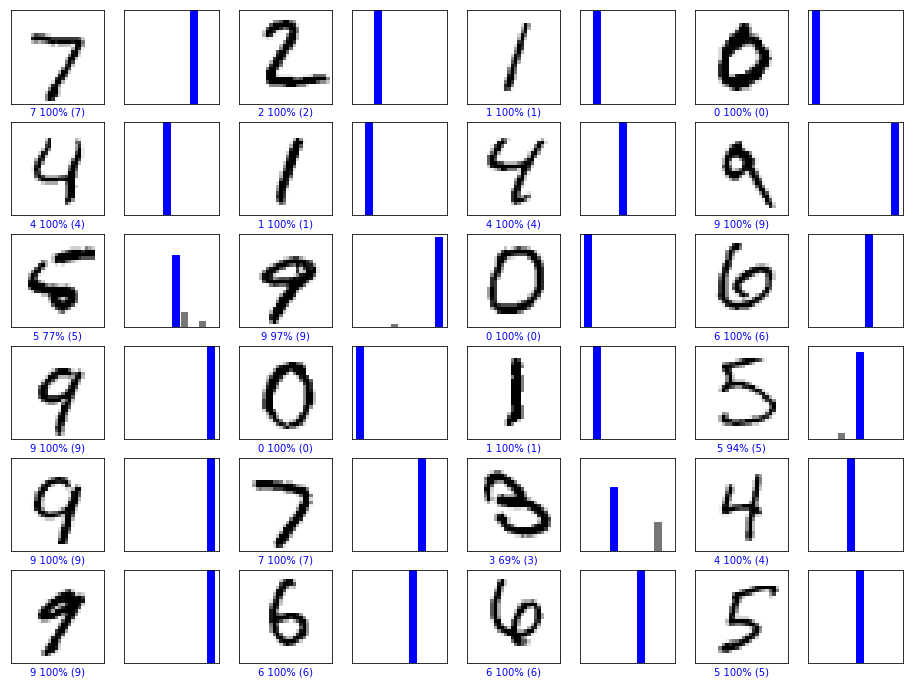

In [16]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()